In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## K-means 군집화
K-Means 군집화 알고리즘은 전체 데이터를 그룹화할 수를, Means는 각 그룹의 중심(centroids)과 데이터의 평균 거리를 의미한다.

K-Means 알고리즘은 아래 과정으로 수행된다.

1) 데이터에서 임의로 K 개의 중심(centroids)을 지정.

2) 각각의 데이터를 가장 가까운 centroids가 속한 그룹으로 분류.
데이터가 그룹으로 분류되는 결과를 바탕으로 centroids를 새롭게 지정.

3) centroids가 더이상 변하지 않을 때까지 위의 과정을 반복

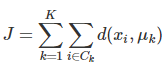

- K = 군집의 개수
- Ck= k번째 군집에 속하는 데이터의 집합
- uk= K번째 군집의 중심 위치
- d = xi,uk 두 데이터 사이의 거리 혹은 비유사도

#### scikit-learn의 cluster 서브패키지
K-평균 군집화를 위한 KMeans 클래스를 제공한다. 다음과 같은 인수를 받을 수 있다.

- n_clusters: 군집의 갯수

- init: 초기화 방법. "random"이면 무작위, "k-means++"이면 K-평균++ 방법. 또는 각 데이터의 군집 라벨.

- n_init: 초기 중심위치 시도 횟수. 디폴트는 10이고 10개의 무작위 중심위치 목록 중 가장 좋은 값을 선택한다.

- max_iter: 최대 반복 횟수.

- random_state: 시드값.

### K-means++알고리즘
초기 중심 위치를 설정하기위 한 알고리즘. 아래 방법으로 되도록 멀리 떨어진 중심 위치 집합을 찾아낸다.

1. 중심 위치를 저장할 집합 M 준비
2. 하나의 중심위치 Mu0를 랜덤하게 선택하여 M에 넣는다.
3. M에 속하지 않는 모든 표본 xi에 대해 거리 d(M,xi)를 계산.d(M,xi)는 M안의 모든 샘플 Muk에 대해 d(Muk,xi)를 계산하여 가장 작은 값 선택
4. d(M,xi)에 비례한 확률로 다음 중심위치 Mu를 선택
5. K개의 중심위치를 선택할 때까지 반복
6. K-평균 방법 사용

In [ ]:
import torch

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

In [ ]:
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

digits=load_digits()
# digits.data[1]

model=KMeans(init="k-means++",n_clusters=10,random_state=0)
model.fit(digits.data)
Y_pred=model.labels_

def show_digits(images,labels):
    f=plt.figure(figsize=(8,2))
    i=0
    while ((i<10)&(i<images.shape[0])):
        ax=f.add_subplot(1,10,i+1)
        ax.imshow(images[i],cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.xaxis.set_ticks([])
        plt.tight_layout()
        i+=1

def show_cluster(images,Y_pred,cluster_number):
    images=images[Y_pred==cluster_number]
    Y_pred=Y_pred[Y_pred==cluster_number]
    show_digits(images,Y_pred)

for i in range(10):
    show_cluster(digits.images,Y_pred,i)

In [ ]:
# 위 예제를 예측 문제로 가정하고 분류결과 행렬을 만든다
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target,Y_pred)

In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score,adjusted_rand_score,silhouette_score

print("ARI : ",adjusted_rand_score(digits.target,Y_pred))
print("ARI : ",adjusted_mutual_info_score(digits.target,Y_pred))
print("silhouette Score : ",silhouette_score(digits.data,Y_pred))

In [ ]:
# 군집화 결과를 주성분 분석을 통해 2차원에 투영하면 다음과 같다. 겹쳐져 있는 부분은 고차원상에서는 떨어져 있을 수 있다.
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X=pca.fit_transform(digits.data)
# PCA n_components=2라서 컬럼 2개
pd.DataFrame(X)
plt.scatter(X[:,0],X[:,1],c=Y_pred,cmap=plt.cm.Set1)
plt.show()

In [ ]:
'''
PCA?

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Parameters
----------
n_components : int, float, None or str
    Number of components to keep.
    if n_components is not set all components are kept::

'''

In [ ]:
'''
pca.fit_transform?
Signature: pca.fit_transform(X, y=None)
Docstring:
Fit the model with X and apply the dimensionality reduction on X.

Parameters
----------
X : array-like, shape (n_samples, n_features)
    Training data, where n_samples is the number of samples
    and n_features is the number of features.

y : None
    Ignored variable.
'''

##### 연습 문제
K-평균 군집화는 유클리드 거리를 사용하므로 너무 차원이 높을 때는 군집화 성능이 떨이질 수 있다. 이때는 차원축소를 한 후 군집화를 하는 것이 도움이 될 수도 있다.

MNIST Digit 데이터를 10차원으로 차원축소하여 K-평균 군집화하고 ARI, AMI, 실루엣계수를 각각 계산하여 차원축소를 하지 않았을 때와 비교하라.

In [ ]:
# PCA로 10차원 축소
n=10
pca = PCA(n_components=n)
digits_pca = pca.fit_transform(digits.data)
print("- 축소 전 : ",digits.data[2],"\n- 축소 전 Target : ",digits.target[2])
print("\n- 축소 후 : ",digits_pca[2],"\n- 축소 후 Target : ",digits.target[2])
print("\n- 축소 전 data shape : ",digits.data[1].shape,"\n- 축소 후 target shape : ",digits_pca[1].shape)

In [ ]:
# 시각화
plt.scatter(digits_pca[:,9],y=digits.target,c=digits.target,cmap=plt.cm.inferno)
plt.show()

In [ ]:
# K-평균 군집화
model1=KMeans(init="k-means++",n_clusters=10,random_state=10)
model1.fit(digits_pca)
Y_pred1=model1.labels_


In [ ]:
# 시각화
fig=plt.figure(figsize=(12,12))
original_shape=digits.images[0].shape

def show_digits(images, Y_pred):
    for i in range(10):
        ax = fig.add_subplot(1,10,i+1)     # add_subplot(nrows, ncols, index, **kwargs)
        ax.imshow(images, cmap=plt.cm.bone)
        ax.set_title(Y_pred1[i])


def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images, cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(Y_pred[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
      
def show_cluster(images, Y_pred, cluster_number):
    # images = images[Y_pred == cluster_number]
    Y_pred = Y_pred[Y_pred == cluster_number]
    show_digits(images, Y_pred)
    

for i in range(10):
    images=pca.components_[i].reshape(original_shape)
    show_cluster(images, Y_pred, i)
    

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, Y_pred1)

In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, Y_pred1))
print("AMI:", adjusted_mutual_info_score(digits.target, Y_pred1))
print("Silhouette Score:", silhouette_score(digits_pca, Y_pred1))